# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from pmdarima import auto_arima
from numpy import mean, std, sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 24

c:\Users\OMEN\anaconda3\lib\site-packages\pmdarima\__init__.py:107: UserWarning: pmdarima support for 32-bit systems is ending with Python 3.10.Your system is not guaranteed to work going forward
  _warnings.warn(


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# Load train data with time column as the index column
train_df = pd.read_csv('df_train.csv', parse_dates=['time'], index_col= ['time']).drop('Unnamed: 0', axis=1)
train_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [3]:
# Load test data with time column as the index column
test_df = pd.read_csv('df_test.csv', parse_dates=['time'], index_col=['time']).drop('Unnamed: 0', axis=1)
test_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
# Determine number of columns and rows
rows, columns = train_df.shape
print('Number of observations in the train data is {}\nNumber of features of the train data is {}'.format(rows, columns))

Number of observations in the train data is 8763
Number of features of the train data is 47


In [5]:
# Determine names of columns
column_names = train_df.columns
column_names

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

In [6]:
# look at data statistics
# Determine the data types of features (numerical and category)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8763 entries, 2015-01-01 03:00:00 to 2017-12-31 21:00:00
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   object 
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null 

From the results of the code above there are **two(2)** categorical features and **forty-five(45)** numerical features. <br>The categorical variables are Valencia_wind_deg and Seville_pressure

In [7]:
# Creating categorical features names
cat_features = ['Valencia_wind_deg', 'Seville_pressure']

# Creating numerical features names by removing categorical features name from the column_name
cont_features = [feature for feature in column_names if not feature in cat_features]
cont_features

['Madrid_wind_speed',
 'Bilbao_rain_1h',
 'Valencia_wind_speed',
 'Seville_humidity',
 'Madrid_humidity',
 'Bilbao_clouds_all',
 'Bilbao_wind_speed',
 'Seville_clouds_all',
 'Bilbao_wind_deg',
 'Barcelona_wind_speed',
 'Barcelona_wind_deg',
 'Madrid_clouds_all',
 'Seville_wind_speed',
 'Barcelona_rain_1h',
 'Seville_rain_1h',
 'Bilbao_snow_3h',
 'Barcelona_pressure',
 'Seville_rain_3h',
 'Madrid_rain_1h',
 'Barcelona_rain_3h',
 'Valencia_snow_3h',
 'Madrid_weather_id',
 'Barcelona_weather_id',
 'Bilbao_pressure',
 'Seville_weather_id',
 'Valencia_pressure',
 'Seville_temp_max',
 'Madrid_pressure',
 'Valencia_temp_max',
 'Valencia_temp',
 'Bilbao_weather_id',
 'Seville_temp',
 'Valencia_humidity',
 'Valencia_temp_min',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Barcelona_temp',
 'Bilbao_temp_min',
 'Bilbao_temp',
 'Barcelona_temp_min',
 'Bilbao_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Madrid_temp_min',
 'load_shortfall_3h']

In [8]:
# Statistics of the numerical features
train_df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [9]:
# Function to describe skewness of features
def describe_skewness(x):
    if (x > -0.5) and (x < 0.5):
        skewness = 'Fairly Symmetrical'
    elif (x > -1) and (x < -0.5):
        skewness = 'Moderate Negative Skew'
    elif (x > 0.5) and (x < 1):
        skewness = 'Moderate Positive Skew'
    elif x < -1:
        skewness = 'High Negative Skew'
    elif x > 1:
        skewness = 'High Positve Skew'
    return skewness

In [10]:
# Skewness of the numerical features
data_skew = train_df.skew()
skew_df = pd.DataFrame({'Feature': data_skew.index, 'Skewness': data_skew.values}) 
skewdf_sorted = skew_df.sort_values('Skewness').reset_index().drop('index', axis=1)
skewdf_sorted['Skewness Description'] = skewdf_sorted['Skewness'].apply(describe_skewness)
skewdf_sorted

,Feature,Skewness,Skewness Description
0,Seville_weather_id,-3.275574,High Negative Skew
1,Madrid_weather_id,-3.107722,High Negative Skew
2,Barcelona_weather_id,-2.584011,High Negative Skew
3,Madrid_pressure,-1.850768,High Negative Skew
4,Valencia_pressure,-1.705162,High Negative Skew
5,Bilbao_weather_id,-1.234844,High Negative Skew
6,Bilbao_pressure,-0.999642,Moderate Negative Skew
7,load_shortfall_3h,-0.384847,Fairly Symmetrical
8,Seville_humidity,-0.310175,Fairly Symmetrical
9,Valencia_humidity,-0.305757,Fairly Symmetrical


In [11]:
# Function to describe skewness of features
def describe_kurtosis(x):
    if (x < -3) or (x > 3):
        kurtosis = 'Outliers Present'
    else:
        kurtosis = 'Outliers Absent'
    return kurtosis


In [12]:
# Kurtosis of the numerical features
data_kurt = train_df.kurtosis()
kurt_df = pd.DataFrame({'Feature': data_kurt.index, 'Kurtosis': data_kurt.values})
kurtdf_sorted = kurt_df.sort_values('Kurtosis').reset_index().drop('index', axis=1)
kurtdf_sorted['Kurtosis Description'] = kurtdf_sorted['Kurtosis'].apply(describe_kurtosis)
kurtdf_sorted


,Feature,Kurtosis,Kurtosis Description
0,Bilbao_clouds_all,-1.533417,Outliers Absent
1,Madrid_humidity,-1.167537,Outliers Absent
2,Bilbao_wind_deg,-1.083530,Outliers Absent
3,Seville_humidity,-1.017983,Outliers Absent
4,Barcelona_wind_deg,-0.959160,Outliers Absent
5,Valencia_humidity,-0.734345,Outliers Absent
6,Barcelona_temp_max,-0.728757,Outliers Absent
7,Barcelona_temp,-0.696555,Outliers Absent
8,Madrid_temp_min,-0.666646,Outliers Absent
9,Madrid_temp_max,-0.662861,Outliers Absent


In [13]:
# evaluate correlation
train_df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


Text(0.5, 1.0, 'Correlation Matrix')

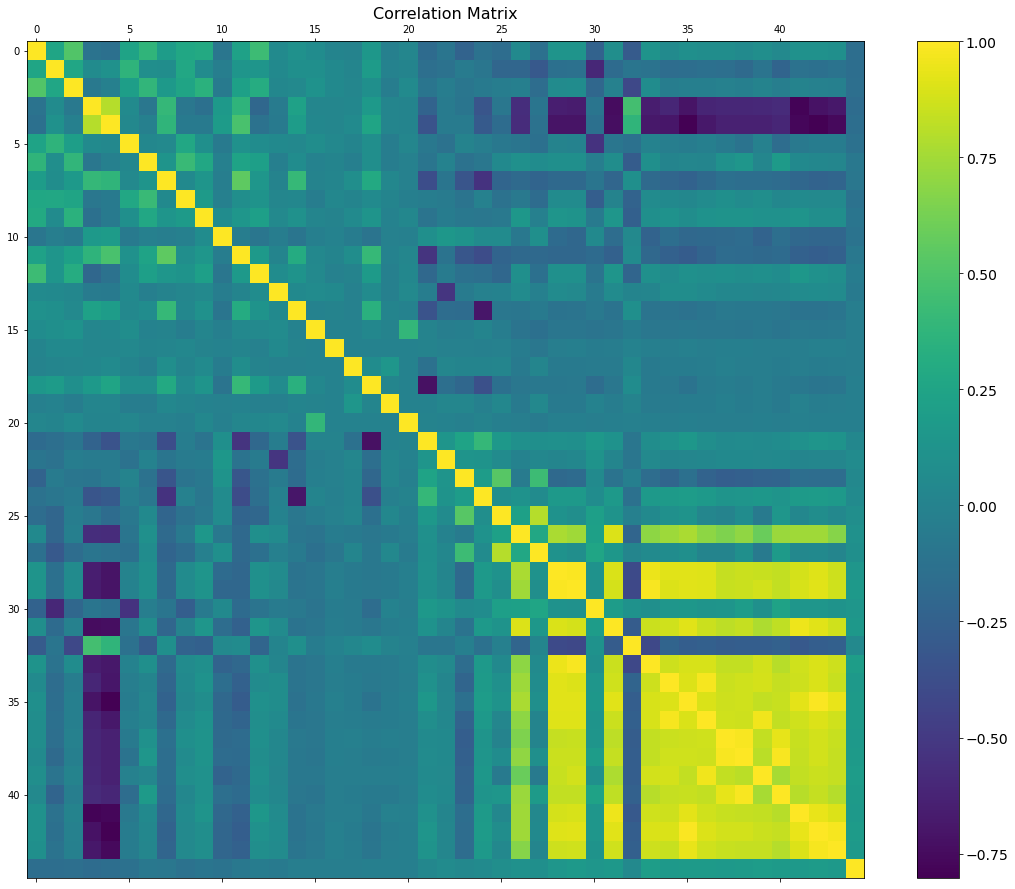

In [14]:
# Correlation  Heatmap
f = plt.figure(figsize=(19, 15))
plt.matshow(train_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)


In [15]:
# Correlation Heatmap with values
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.101497,-0.003074,-0.122915,-0.086691,0.054035,0.103342,0.075541,0.091352,0.093919,-0.031661,0.080357,-0.279825,0.093177,0.011151,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,-0.0

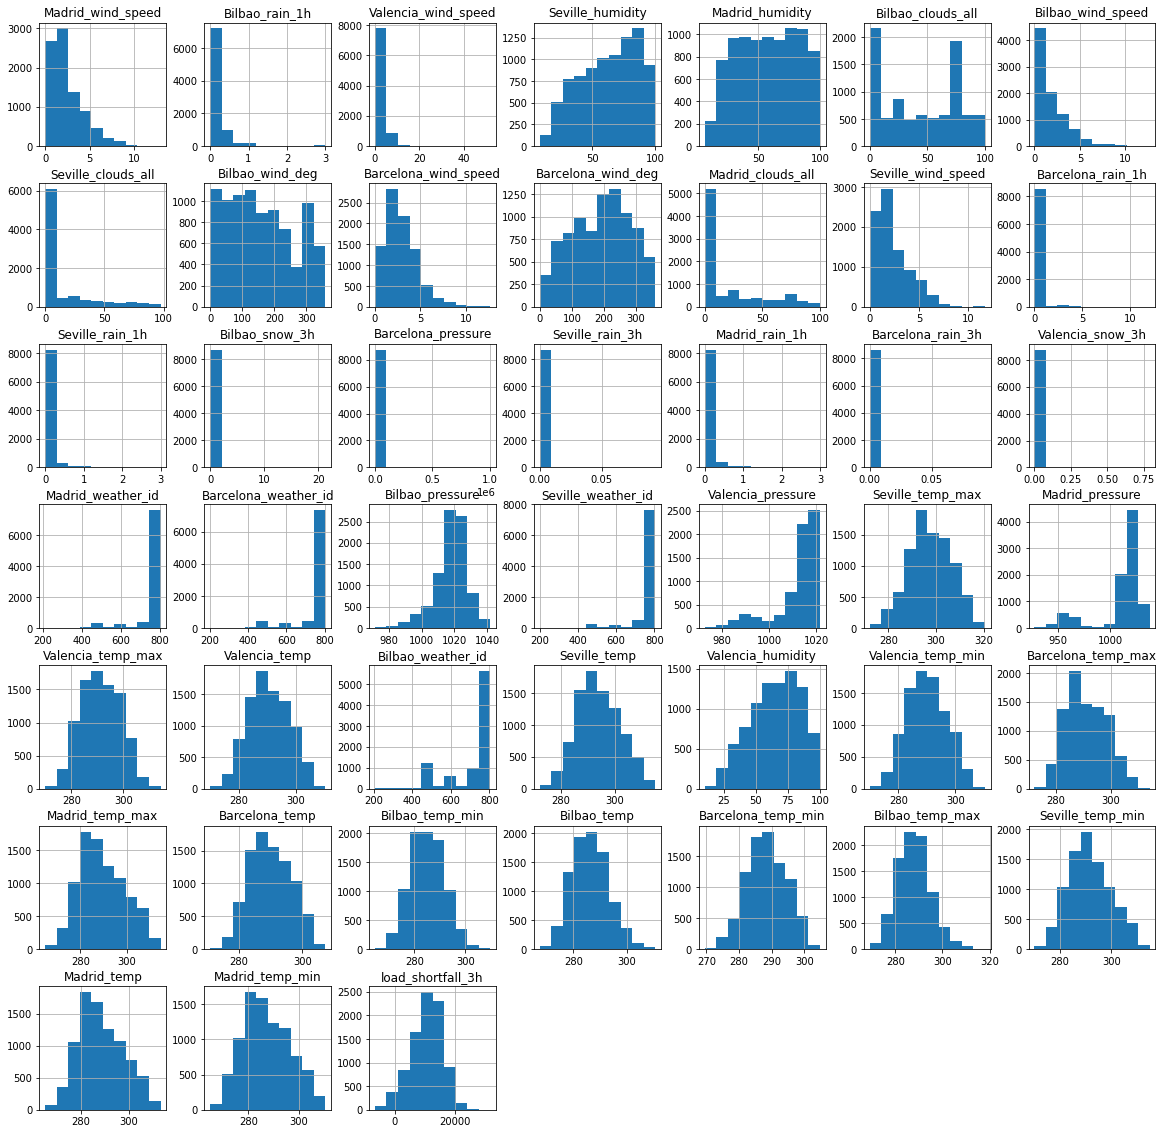

In [16]:
# have a look at feature distributions
# Histogram using bars
train_df[cont_features].hist(figsize=(20,20));

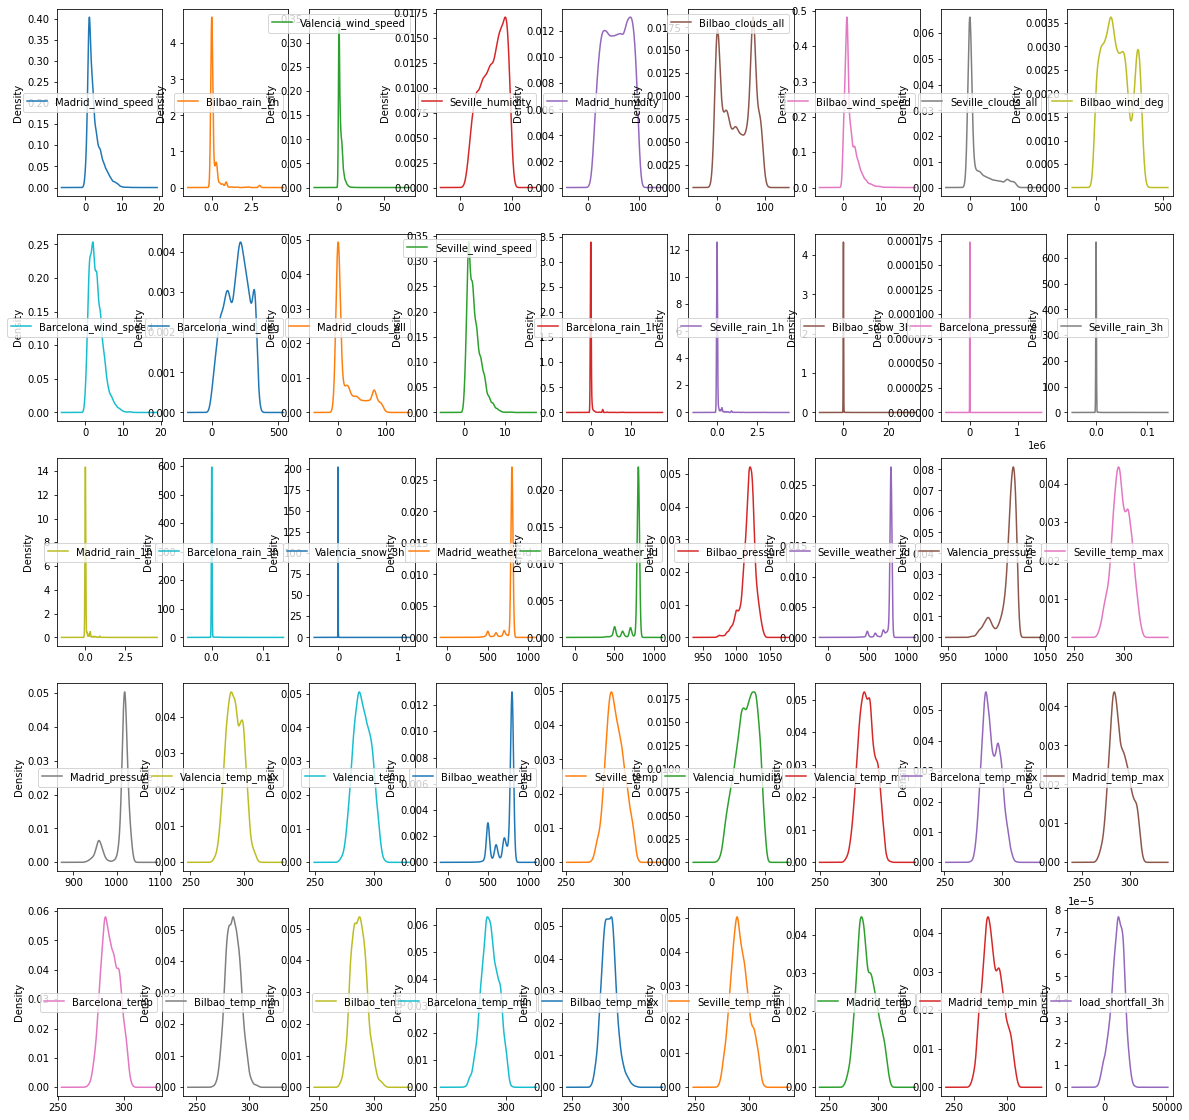

In [17]:
# have a look at feature distributions
# Histogram using lines
train_df[cont_features].plot(kind='density', subplots=True, layout=(5, 9), sharex=False, figsize=(20, 20));

<BarContainer object of 25 artists>

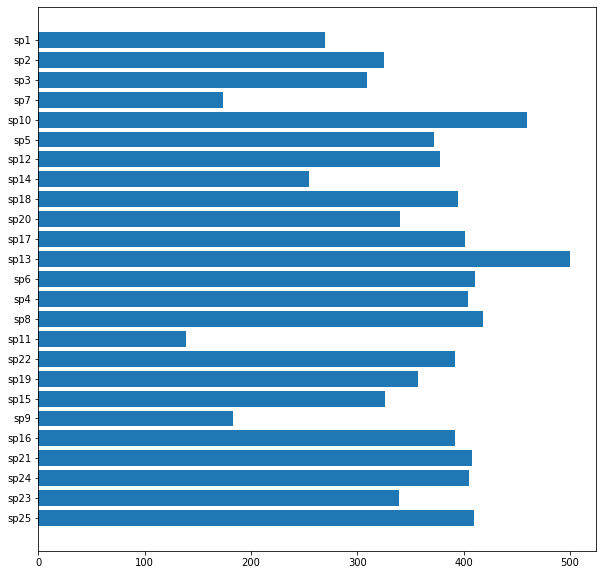

In [18]:
Seville_pressure = train_df[cat_features[1]].values
Seville_pressure_frequency = {}

# iterating over the list
for item in Seville_pressure:
   # checking the element in dictionary
   if item in Seville_pressure_frequency:
      # incrementing the counr
      Seville_pressure_frequency[item] += 1
   else:
      # initializing the count
      Seville_pressure_frequency[item] = 1
plt.figure(figsize=(10,10))
plt.barh(list(Seville_pressure_frequency.keys()), list(Seville_pressure_frequency.values()))


<BarContainer object of 10 artists>

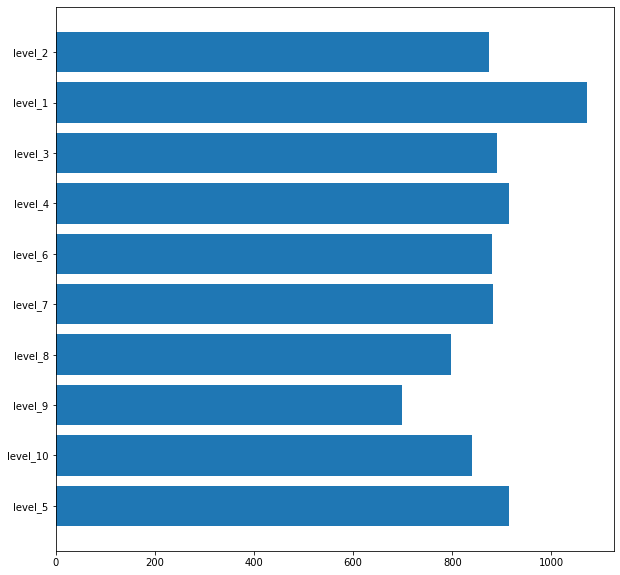

In [19]:
Valencia_wind_deg = train_df[cat_features[0]].values
Valencia_wind_deg_frequency = {}

# iterating over the list
for item in Valencia_wind_deg:
   # checking the element in dictionary
   if item in Valencia_wind_deg_frequency:
      # incrementing the counr
      Valencia_wind_deg_frequency[item] += 1
   else:
      # initializing the count
      Valencia_wind_deg_frequency[item] = 1
plt.figure(figsize=(10, 10))
plt.barh(list(Valencia_wind_deg_frequency.keys()),
         list(Valencia_wind_deg_frequency.values()))


In [20]:
# remove missing values/ features
train_df.isnull().sum()


Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

From the result obtained above only Valencia_pressure has missing values of 2068

In [21]:
# Replacing missing values of Valencia_pressure with its mode
train_df2 = train_df.copy()
Valencia_pressure_mode = train_df['Valencia_pressure'].mode()[0]
train_df2['Valencia_pressure'] = train_df['Valencia_pressure'].fillna(train_df['Valencia_pressure'].mode()[0])
train_df2.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [22]:
# Checking for missing values
train_df2.isnull().sum()


Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_te

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<BarContainer object of 25 artists>

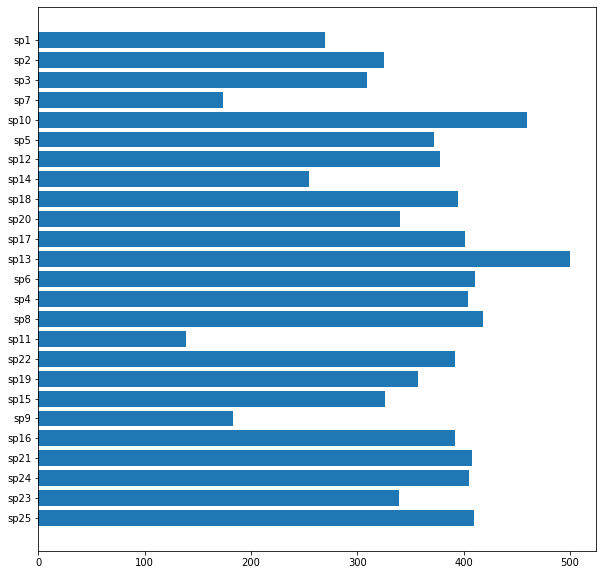

In [23]:
# remove missing values/ features

Seville_pressure = train_df[cat_features[1]].values
Seville_pressure_frequency = {}

# iterating over the list
for item in Seville_pressure:
   # checking the element in dictionary
   if item in Seville_pressure_frequency:
      # incrementing the counr
      Seville_pressure_frequency[item] += 1
   else:
      # initializing the count
      Seville_pressure_frequency[item] = 1
plt.figure(figsize=(10, 10))
plt.barh(list(Seville_pressure_frequency.keys()),
         list(Seville_pressure_frequency.values()))


<BarContainer object of 10 artists>

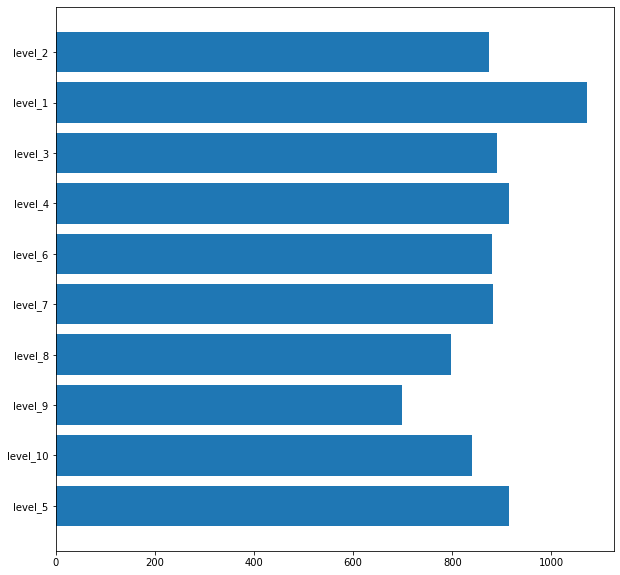

In [24]:
# create new features

Valencia_wind_deg = train_df[cat_features[0]].values
Valencia_wind_deg_frequency = {}

# iterating over the list
for item in Valencia_wind_deg:
   # checking the element in dictionary
   if item in Valencia_wind_deg_frequency:
      # incrementing the counr
      Valencia_wind_deg_frequency[item] += 1
   else:
      # initializing the count
      Valencia_wind_deg_frequency[item] = 1
plt.figure(figsize=(10, 10))
plt.barh(list(Valencia_wind_deg_frequency.keys()),
         list(Valencia_wind_deg_frequency.values()))


In [25]:
# engineer existing features
# Creating new features from time column
train_df2['time'] = pd.to_datetime(train_df2.index)
traindf_eng = train_df2.copy()
traindf_eng['Year'] = train_df2['time'].dt.year
traindf_eng['Month'] = train_df2['time'].dt.month
traindf_eng['Day'] = train_df2['time'].dt.day
traindf_eng['Day_of_week'] = train_df2['time'].dt.dayofweek
traindf_eng['Hour'] = train_df2['time'].dt.hour
traindf_eng.drop('time', axis=1, inplace=True)
traindf_eng.head()


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Day_of_week,Hour
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3
2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,3,6
2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,3,9
2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,3,12
2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,3,15


In [26]:
# Determine number of columns and rows
rows, columns = traindf_eng.shape
print('Number of features has increased to {}'.format(columns))

Number of features has increased to 52


In [27]:
column_names1 = traindf_eng.columns

# Creating categorical features names
cat_features = ['Valencia_wind_deg', 'Seville_pressure']

# Creating numerical features names by removing categorical features name from the column_name
cont_features1 = [
    feature for feature in column_names1 if not feature in cat_features]


In [28]:
# engineer existing features
scaler = StandardScaler()
normalizer = MinMaxScaler()
oridnal_encoder = OrdinalEncoder()
numerical_features = traindf_eng[cont_features1].drop(
    'load_shortfall_3h', axis=1).values
scaled_numerical_features = scaler.fit_transform(numerical_features)
normalized_numerical_features = normalizer.fit_transform(numerical_features)
categorical_features = traindf_eng[cat_features]
hotcoded_categorical_features = pd.get_dummies(
    categorical_features, drop_first=True).values
orded_categorical_features = oridnal_encoder.fit_transform(
    categorical_features)
load_shortfall = traindf_eng['load_shortfall_3h'].values


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [29]:
# split data
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [31]:
# Function to creating the independent variables
def merge_num_cat(num, cat):
    merged_feat = np.hstack((num, cat))
    return merged_feat


In [32]:
# create targets and features dataset
X = merge_num_cat(numerical_features, orded_categorical_features)
y = load_shortfall

In [33]:
# create one or more ML models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
model_list = [linear_model, ridge_model,
              lasso_model, tree_model, random_forest_model]

In [34]:
# evaluate one or more ML models
def cross_validate(model, X, y, scoring='r2', cv=cv, n_jobs=-1):
    scores = cross_val_score(
        model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return mean(scores), std(scores)


RMS = {}
for model in model_list:
    RMS[model] = cross_validate(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
RMS

{LinearRegression(): (0.1874638266371627, 0.026160718724518948),
 Ridge(): (0.18681113777670627, 0.025989572596898703),
 Lasso(): (0.18658019206488802, 0.026026654664223884),
 DecisionTreeRegressor(): (0.46817350856381984, 0.025095460064536515),
 RandomForestRegressor(): (0.7355644513410112, 0.01738108348823499)}

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic